   station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat    

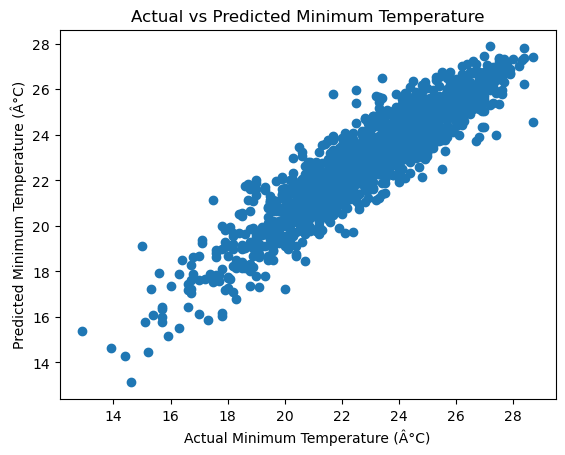

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
file_path = r'C:\Users\sv697\Downloads\temperature (1).csv'
data = pd.read_csv(file_path)
print(data.head())
data = data.drop('Date', axis=1)
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
X_min = data_imputed.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y_min = data_imputed['Next_Tmin']
X_min_train, X_min_test, y_min_train, y_min_test = train_test_split(X_min, y_min, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_min_train_scaled = scaler.fit_transform(X_min_train)
X_min_test_scaled = scaler.transform(X_min_test)
model_min = LinearRegression()
model_min.fit(X_min_train_scaled, y_min_train)
y_min_pred = model_min.predict(X_min_test_scaled)
mse_min = mean_squared_error(y_min_test, y_min_pred)
print(f'Mean Squared Error (Minimum Temperature): {mse_min}')
plt.scatter(y_min_test, y_min_pred)
plt.xlabel('Actual Minimum Temperature (Â°C)')
plt.ylabel('Predicted Minimum Temperature (Â°C)')
plt.title('Actual vs Predicted Minimum Temperature')
plt.show()


   station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat    

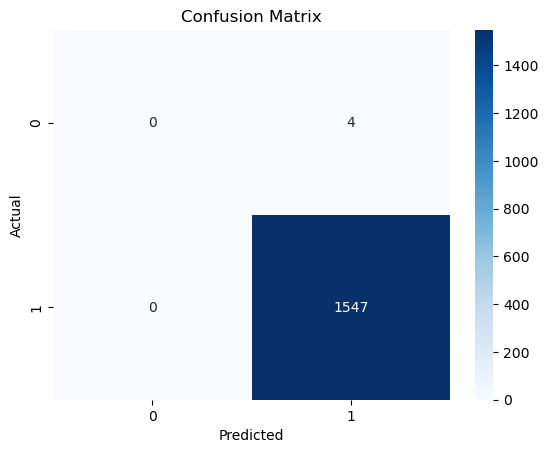

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r'C:\Users\sv697\Downloads\temperature (1).csv'
data = pd.read_csv(file_path)
print(data.head())
data = data.drop('Date', axis=1)
data['is_hot'] = (data['Next_Tmax'] > data['Next_Tmin']).astype(int)
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

X = data_imputed.drop(['Next_Tmax', 'Next_Tmin', 'is_hot'], axis=1)
y = data_imputed['is_hot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


   station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat    

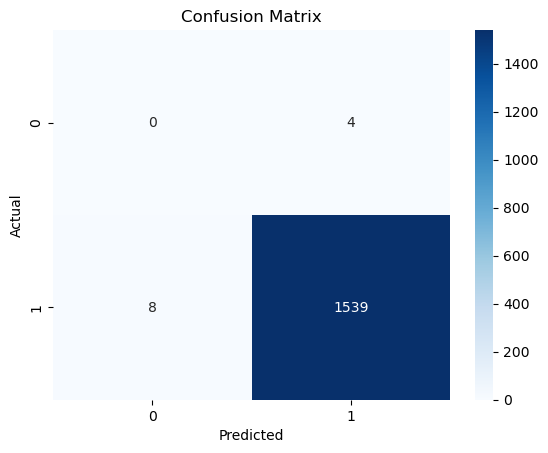

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r'C:\Users\sv697\Downloads\temperature (1).csv'
data = pd.read_csv(file_path)
print(data.head())
data = data.drop('Date', axis=1)

data['is_hot'] = (data['Next_Tmax'] > data['Next_Tmin']).astype(int)

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

X = data_imputed.drop(['Next_Tmax', 'Next_Tmin', 'is_hot'], axis=1)
y = data_imputed['is_hot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


   station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat    

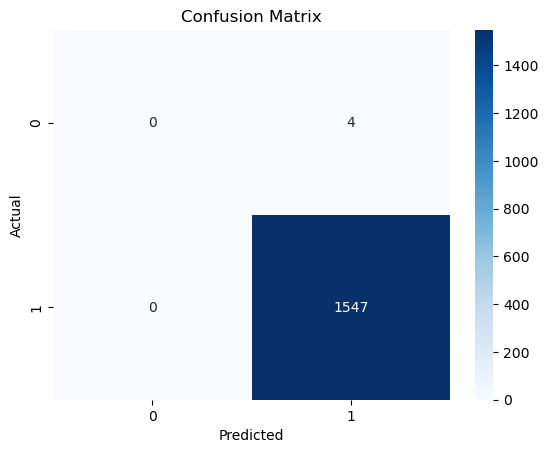

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r'C:\Users\sv697\Downloads\temperature (1).csv'
data = pd.read_csv(file_path)
print(data.head())
data = data.drop('Date', axis=1)
data['is_hot'] = (data['Next_Tmax'] > data['Next_Tmin']).astype(int)
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
X = data_imputed.drop(['Next_Tmax', 'Next_Tmin', 'is_hot'], axis=1)
y = data_imputed['is_hot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


   station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat    

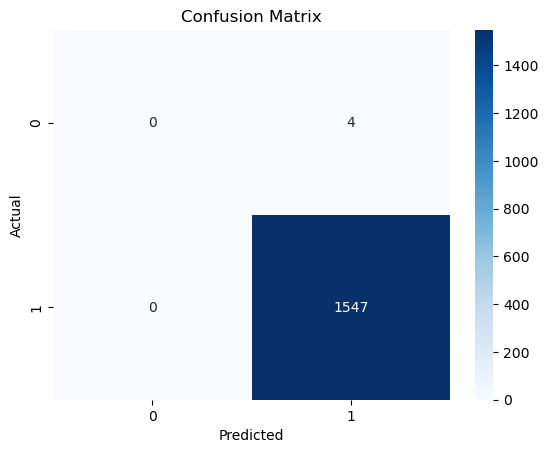

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r'C:\Users\sv697\Downloads\temperature (1).csv'
data = pd.read_csv(file_path)
print(data.head())
data = data.drop('Date', axis=1)
data['is_hot'] = (data['Next_Tmax'] > data['Next_Tmin']).astype(int)
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
X = data_imputed.drop(['Next_Tmax', 'Next_Tmin', 'is_hot'], axis=1)
y = data_imputed['is_hot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = SVC(kernel='linear', random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


   station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat    

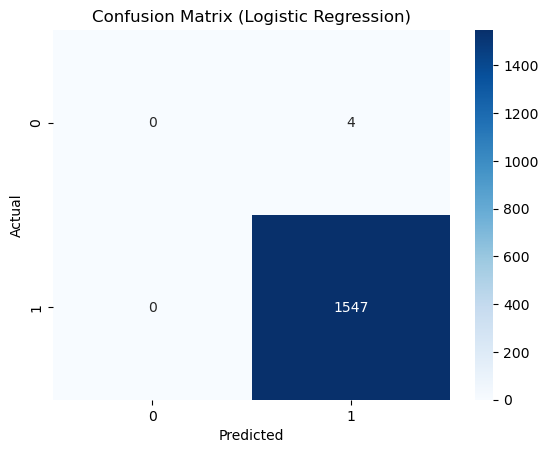

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r'C:\Users\sv697\Downloads\temperature (1).csv'
data = pd.read_csv(file_path)
print(data.head())
data = data.drop('Date', axis=1)
data['is_hot'] = (data['Next_Tmax'] > data['Next_Tmin']).astype(int)
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
X_min = data_imputed.drop(['Next_Tmax', 'Next_Tmin', 'is_hot'], axis=1)
y_min = data_imputed['Next_Tmin']
y_class = data_imputed['is_hot']
X_min_train, X_min_test, y_min_train, y_min_test = train_test_split(X_min, y_min, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_min, y_class, test_size=0.2, random_state=42)
scaler_min = StandardScaler()
X_min_train_scaled = scaler_min.fit_transform(X_min_train)
X_min_test_scaled = scaler_min.transform(X_min_test)
scaler_class = StandardScaler()
X_train_scaled = scaler_class.fit_transform(X_train)
X_test_scaled = scaler_class.transform(X_test)
model_min = LinearRegression()
model_min.fit(X_min_train_scaled, y_min_train)
y_min_pred = model_min.predict(X_min_test_scaled)
mse_min = mean_squared_error(y_min_test, y_min_pred)
print(f'Mean Squared Error (Minimum Temperature): {mse_min}')
model_class_logistic = LogisticRegression()
model_class_logistic.fit(X_train_scaled, y_train)
y_pred_logistic = model_class_logistic.predict(X_test_scaled)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print(f'Accuracy (Logistic Regression): {accuracy_logistic}')
print('Confusion Matrix (Logistic Regression):')
print(conf_matrix_logistic)

model_class_tree = DecisionTreeClassifier(random_state=42)
model_class_tree.fit(X_train_scaled, y_train)
y_pred_tree = model_class_tree.predict(X_test_scaled)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print(f'Accuracy (Decision Tree): {accuracy_tree}')
print('Confusion Matrix (Decision Tree):')
print(conf_matrix_tree)

model_class_forest = RandomForestClassifier(n_estimators=100, random_state=42)
model_class_forest.fit(X_train_scaled, y_train)
y_pred_forest = model_class_forest.predict(X_test_scaled)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
print(f'Accuracy (Random Forest): {accuracy_forest}')
print('Confusion Matrix (Random Forest):')
print(conf_matrix_forest)

model_class_svm = SVC(kernel='linear', random_state=42)
model_class_svm.fit(X_train_scaled, y_train)
y_pred_svm = model_class_svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(f'Accuracy (SVM): {accuracy_svm}')
print('Confusion Matrix (SVM):')
print(conf_matrix_svm)

sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


Random Forest - Accuracy: 0.9974210186976145
Random Forest - Confusion Matrix:
[[   0    4]
 [   0 1547]]
Random Forest - Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       1.00      1.00      1.00      1547

    accuracy                           1.00      1551
   macro avg       0.50      0.50      0.50      1551
weighted avg       0.99      1.00      1.00      1551



C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


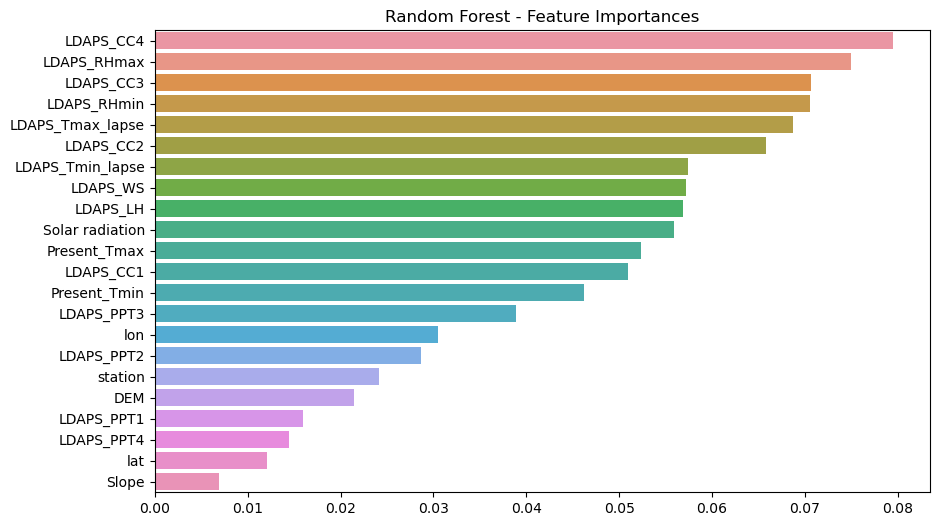

SVM - Accuracy: 0.9974210186976145
SVM - Confusion Matrix:
[[   0    4]
 [   0 1547]]
SVM - Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       1.00      1.00      1.00      1547

    accuracy                           1.00      1551
   macro avg       0.50      0.50      0.50      1551
weighted avg       0.99      1.00      1.00      1551



C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\sv697\Downloads\temperature (1).csv'
data = pd.read_csv(file_path)

data = data.drop('Date', axis=1)

data['is_hot'] = (data['Next_Tmax'] > data['Next_Tmin']).astype(int)

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

X = data_imputed.drop(['Next_Tmax', 'Next_Tmin', 'is_hot'], axis=1)
y = data_imputed['is_hot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train_scaled, y_train)

rf_best_params = rf_grid_search.best_params_

rf_best_model = rf_grid_search.best_estimator_

y_pred_rf = rf_best_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest - Accuracy: {accuracy_rf}')
print('Random Forest - Confusion Matrix:')
print(conf_matrix_rf)
print('Random Forest - Classification Report:')
print(classification_report_rf)

feature_importances = pd.Series(rf_best_model.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.title('Random Forest - Feature Importances')
plt.show()

svm_param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

svm_model = SVC(random_state=42)
svm_random_search = RandomizedSearchCV(svm_model, svm_param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
svm_random_search.fit(X_train_scaled, y_train)

svm_best_params = svm_random_search.best_params_

svm_best_model = svm_random_search.best_estimator_

y_pred_svm = svm_best_model.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

print(f'SVM - Accuracy: {accuracy_svm}')
print('SVM - Confusion Matrix:')
print(conf_matrix_svm)
print('SVM - Classification Report:')
print(classification_report_svm)


Random Forest - Accuracy: 0.9974210186976145
Random Forest - Confusion Matrix:
[[   0    4]
 [   0 1547]]
Random Forest - Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       1.00      1.00      1.00      1547

    accuracy                           1.00      1551
   macro avg       0.50      0.50      0.50      1551
weighted avg       0.99      1.00      1.00      1551



C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


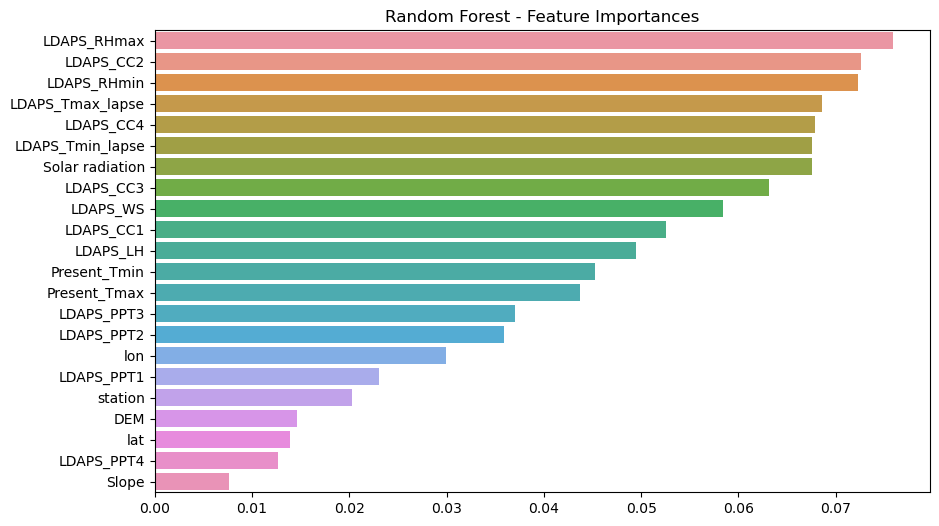

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\sv697\Downloads\temperature (1).csv'
data = pd.read_csv(file_path)

data = data.drop('Date', axis=1)

data['is_hot'] = (data['Next_Tmax'] > data['Next_Tmin']).astype(int)

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

X = data_imputed.drop(['Next_Tmax', 'Next_Tmin', 'is_hot'], axis=1)
y = data_imputed['is_hot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest - Accuracy: {accuracy_rf}')
print('Random Forest - Confusion Matrix:')
print(conf_matrix_rf)
print('Random Forest - Classification Report:')
print(classification_report_rf)

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.title('Random Forest - Feature Importances')
plt.show()


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\sv697\Downloads\temperature (1).csv'
data = pd.read_csv(file_path)

data = data.drop('Date', axis=1)

data['is_hot'] = (data['Next_Tmax'] > data['Next_Tmin']).astype(int)

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

X = data_imputed.drop(['Next_Tmax', 'Next_Tmin', 'is_hot'], axis=1)
y = data_imputed['is_hot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train_scaled, y_train)

rf_best_params = rf_grid_search.best_params_

rf_best_model = rf_grid_search.best_estimator_

y_pred_rf = rf_best_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest (After Hyperparameter Tuning) - Accuracy: {accuracy_rf}')
print('Random Forest (After Hyperparameter Tuning) - Confusion Matrix:')
print(conf_matrix_rf)
print('Random Forest (After Hyperparameter Tuning) - Classification Report:')
print(classification_report_rf)


Random Forest (After Hyperparameter Tuning) - Accuracy: 0.9974210186976145
Random Forest (After Hyperparameter Tuning) - Confusion Matrix:
[[   0    4]
 [   0 1547]]
Random Forest (After Hyperparameter Tuning) - Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       1.00      1.00      1.00      1547

    accuracy                           1.00      1551
   macro avg       0.50      0.50      0.50      1551
weighted avg       0.99      1.00      1.00      1551



C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from joblib import dump

file_path = r'C:\Users\sv697\Downloads\temperature (1).csv'
data = pd.read_csv(file_path)

data = data.drop('Date', axis=1)

data['is_hot'] = (data['Next_Tmax'] > data['Next_Tmin']).astype(int)

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

X = data_imputed.drop(['Next_Tmax', 'Next_Tmin', 'is_hot'], axis=1)
y = data_imputed['is_hot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train_scaled, y_train)

rf_best_params = rf_grid_search.best_params_

rf_best_model = rf_grid_search.best_estimator_

dump(rf_best_model, 'best_model_rf.joblib')

y_pred_rf = rf_best_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Summary
summary = """
Chosen Model: Random Forest

Reasons:
- Accuracy: {:.2%} (After Hyperparameter Tuning)
- Confusion Matrix:
{}
- Classification Report:
{}
- Hyperparameters:
{}
""".format(accuracy_rf, conf_matrix_rf, classification_report_rf, rf_best_params)

print(summary)



Chosen Model: Random Forest

Reasons:
- Accuracy: 99.74% (After Hyperparameter Tuning)
- Confusion Matrix:
[[   0    4]
 [   0 1547]]
- Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       1.00      1.00      1.00      1547

    accuracy                           1.00      1551
   macro avg       0.50      0.50      0.50      1551
weighted avg       0.99      1.00      1.00      1551

- Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}



C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
